In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def pix2radec(nside, index):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(np.pi*2.-phi), -np.degrees(theta-np.pi/2.)

def radec2pix(nside, RA, dec):
    return hp.pixelfunc.ang2pix(nside,np.radians(-dec+90.),np.radians(360.-RA))

In [5]:
nside = 512
npix = hp.nside2npix(nside)
path = '/global/cscratch1/sd/keskital/for_yuyang/sat1_s21_deep_ST1_f145_4way_set00_hits.fits'
so_depth = hp.read_map(path, dtype=np.float64)

/global/common/software/cmb/cori/cmbenv-gcc_20200630/cmbenv_aux/lib/python3.7/site-packages/healpy-1.13.0-py3.7-linux-x86_64.egg/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


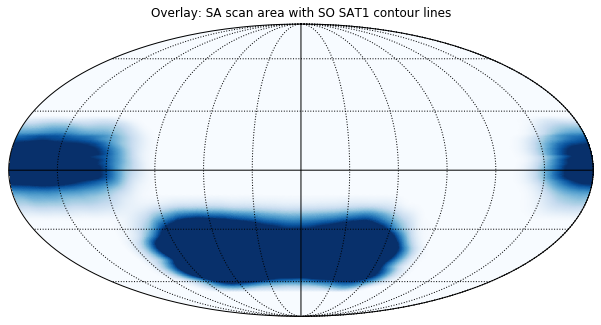

In [36]:
#CONTOUR LINES
cutoff = 3e5
so_depth[(so_depth>cutoff)] = cutoff

lines = np.array([0.7, 0.5, 0.3, 0.1, 0.01]) * cutoff
rtol = np.array([3e-2, 5e-2, 5e-2, 1e-1, 2e-1])
colors = np.array(['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple'])

hp.mollview(so_depth, cmap='Blues', xsize=2000, cbar=False, title='Overlay: SA scan area with SO SAT1 contour lines')
# for i, value in enumerate(lines):
#     ipix = np.where(np.isclose(so_depth, value, rtol=rtol[i], atol=0))[0]
#     theta, phi = hp.pix2ang(nside, ipix)
#     hp.projplot(theta, phi, color=colors[i], alpha=1)
# hp.projtext(np.pi/3, 0, 'Contour lines at \n 70%, 50%, 30%, 10%, \n and 1% of max depth', size='xx-large')
hp.graticule()

In [6]:
#CONTOUR LINES
cutoff = 2e5
so_depth[(so_depth>cutoff)] = cutoff

lines = np.array([0.7, 0.5, 0.3, 0.1, 0.01]) * cutoff
rtol = np.array([3e-2, 5e-2, 5e-2, 1e-1, 2e-1])
colors = np.array(['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple'])
alphas = np.array([1, 0.7, 0.5, 0.3, 0.1])

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


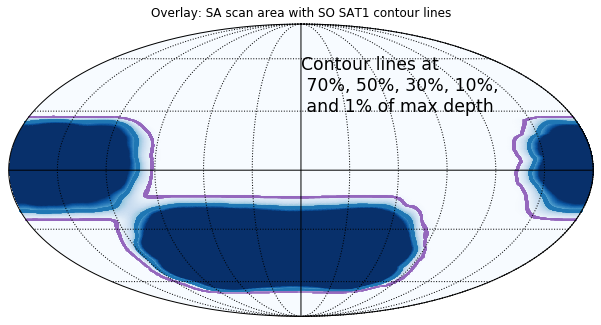

In [7]:
hp.mollview(so_depth, cmap='Blues', xsize=2000, cbar=False, title='Overlay: SA scan area with SO SAT1 contour lines')
for i, value in enumerate(lines):
    ipix = np.where(np.isclose(so_depth, value, rtol=rtol[i], atol=0))[0]
    theta, phi = hp.pix2ang(nside, ipix)
    hp.projplot(theta, phi, color=colors[i], alpha=1)
hp.projtext(np.pi/3, 0, 'Contour lines at \n 70%, 50%, 30%, 10%, \n and 1% of max depth', size='xx-large')
hp.graticule()

/global/common/software/cmb/cori/cmbenv-gcc_20200630/cmbenv_aux/lib/python3.7/site-packages/healpy-1.13.0-py3.7-linux-x86_64.egg/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


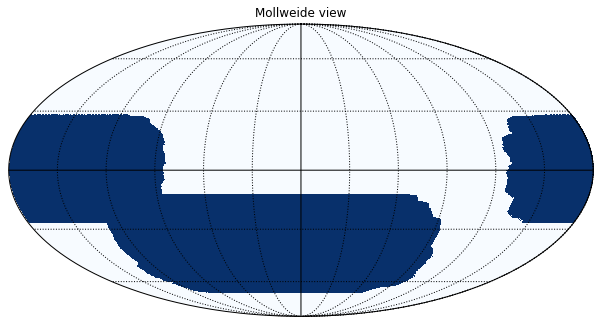

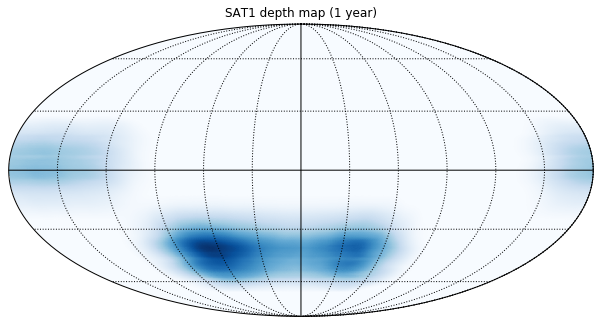

In [6]:
path = '/global/cscratch1/sd/keskital/for_yuyang/sat1_s21_deep_ST1_f145_4way_set00_hits.fits'
so_depth = hp.read_map(path, dtype=np.float64)
so_hits = np.zeros(npix)
so_hits[(so_depth!=0)] = 1

hp.mollview(so_hits, cmap='Blues', xsize=2000, cbar=False)
hp.graticule()
hp.mollview(so_depth, cmap='Blues', xsize=2000, cbar=False, title='SAT1 depth map (1 year)')
hp.graticule()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


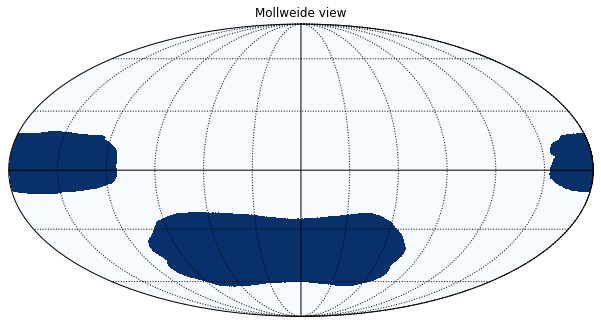

In [151]:
np.max(so_depth)

threshold = 2*np.average(so_depth)
so_average = np.zeros(npix)
so_average[(so_depth<threshold)] = 0
so_average[(so_depth>=threshold)] = 1

hp.mollview(so_average, cmap='Blues', xsize=2000, cbar=False)
hp.graticule()

In [6]:
patch = np.zeros(npix)
indices = np.arange(npix)
RA, dec = pix2radec(nside, indices)
RA[(RA<-180)] += 360

In [7]:
south = indices[(dec> -65) & (dec<-25) & (RA>-50) & (RA<70)]
north1 = indices[(dec> -10) & (dec< 10) & (RA<-130) & (RA>-180)]
north2 = indices[(dec> -10) & (dec< 10) & (RA>130) & (RA<180)]

In [8]:
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
 
colors1 = get_cmap('Reds', 256)(np.linspace(0, 1, 256))
colors1[..., 3] = 0.4 # Make colormap partially transparent
cmap1 = ListedColormap(colors1)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


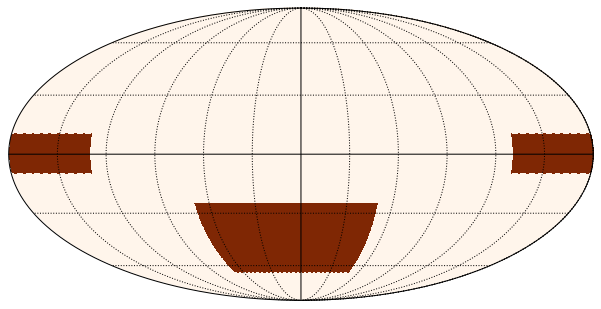

In [9]:
patch[south] = 1
patch[north1] = 1
patch[north2] = 1

#hp.mollview(so_depth, fig=0, cmap='Blues', xsize=2000, cbar=False, title='Overlay: SO SAT depth map (blue) and proposed SA scan area (red)')
hp.mollview(patch, cmap='Oranges', xsize=2000, cbar=False, title=None)
hp.graticule()

In [14]:
(len(north1)+len(north2))/npix *100

4.821014404296875

In [225]:
hp.mollview(so_average, fig=0, cmap='Blues', xsize=2000, cbar=False, title='Overlay: SO SAT1 hit map (blue) with proposed SA scan area (red)')
hp.mollview(patch, fig=0, cmap=cmap1, xsize=2000, cbar=False, title=None)
hp.graticule()

NameError: name 'so_average' is not defined

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


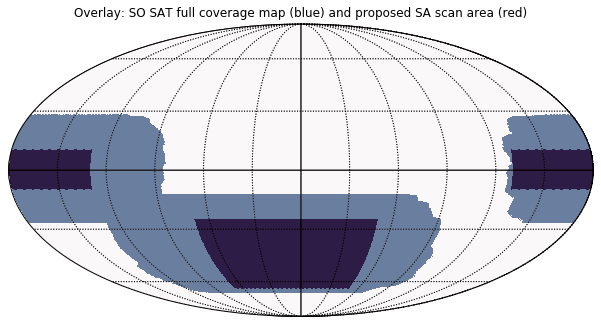

In [165]:
hp.mollview(so_hits, fig=0, cmap='Blues', xsize=2000, cbar=False, title='Overlay: SO SAT full coverage map (blue) and proposed SA scan area (red)')
hp.mollview(patch, fig=0, cmap=cmap1, xsize=2000, cbar=False, title=None)
hp.graticule()

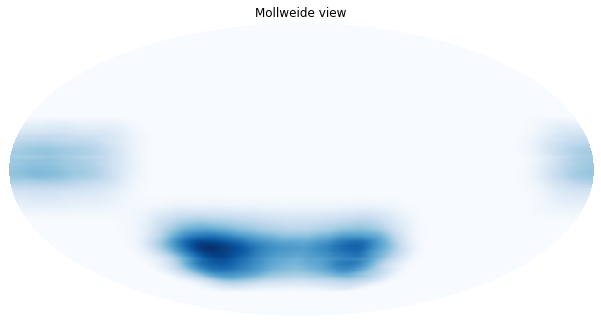

In [77]:
so_depth = hp.mollview(so_depth, cmap='Blues', xsize=2000, cbar=False, return_projected_map=True)

In [94]:
so_depth[(so_depth==-np.inf)] = 0

In [84]:
X = np.arange(2000)
Y = np.arange(1000)
xv, yv = np.meshgrid(X, Y)

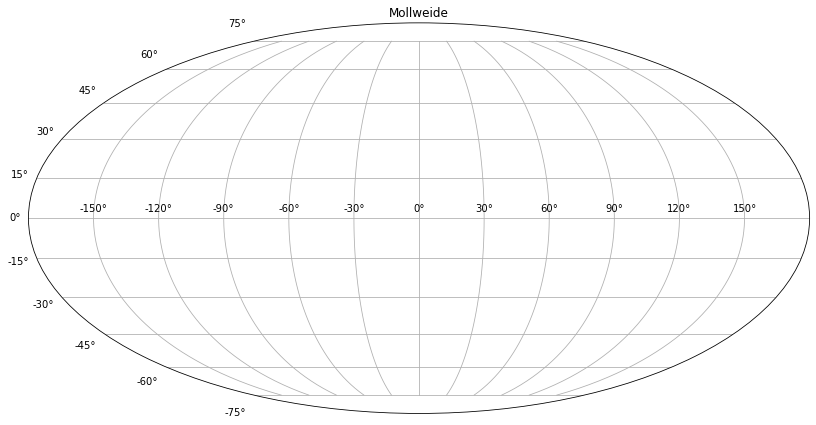

In [102]:
plt.figure(figsize=(14,10))
plt.subplot(projection="mollweide")
plt.title("Mollweide")
plt.grid(True)

